# Credit Card Fraud Detection - Capstone Project

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LABELS = ['Normal', 'Fraud']

In [2]:
# Loading dataset to a Pandas dataframe
credit_card_data = pd.read_csv(r"C:\Users\vani a s\creditcard.csv")

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().values.any()

False

In [7]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\vani a s\AppData\Local\Temp\ipykernel_14116\407181457.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(credit_card_data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

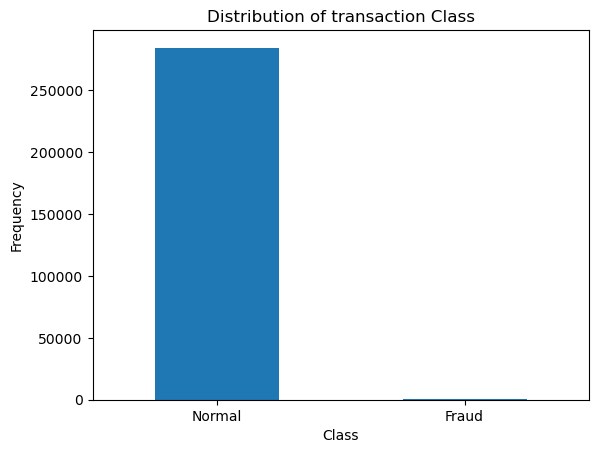

In [8]:
# Distribution of normal and fraudulent transactions
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title('Distribution of transaction Class')
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

In [9]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### This Dataset is highly unbalanced

#### 0 ----> Normal Transaction
#### 1 ----> Fraud Transaction

In [10]:
# Separating the data for analysis

Fraud = credit_card_data[credit_card_data['Class'] == 1]

Normal = credit_card_data[credit_card_data['Class'] == 0]


In [11]:
print(Fraud.shape,Normal.shape)

(492, 31) (284315, 31)


In [12]:
# Stastistical measure of the data
# here we will analyse more information from the trasaction data 

Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

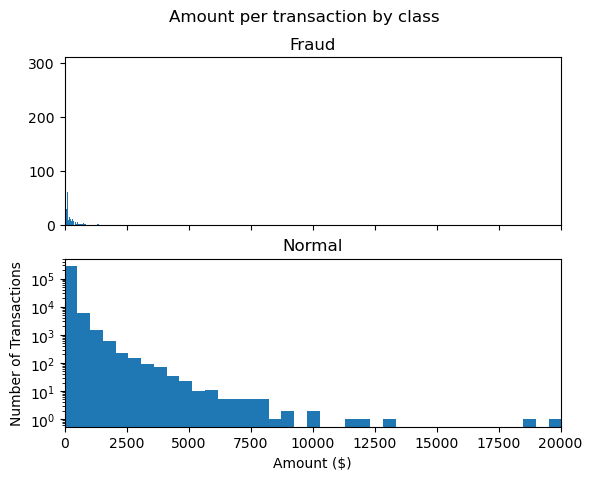

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

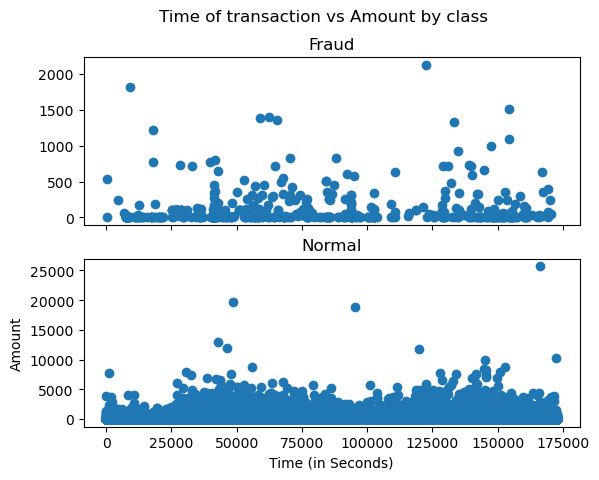

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel ('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [16]:
# comparing the values of both transactions

credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
credit_card_data.groupby('Class').median()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,84711.0,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.00
1,75568.5,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.25


In [18]:
credit_card_data.groupby('Class').max()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,172792.0,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16
1,170348.0,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.87


## Under-Sampling

#### Building a Sample Dataset containing similar distribution of Normal and Fraudulent transactions

##### Number of Fraudulent trasactions ----> 492

In [19]:
Normal_sample = Normal.sample(n=492)

### Concatenating the two Dataframes

In [20]:
New_data = pd.concat([Normal_sample, Fraud], axis = 0)

In [21]:
New_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
116102,74145.0,1.204085,0.219617,0.623800,0.550944,-0.505809,-0.781092,-0.025231,-0.081606,-0.255593,...,-0.190559,-0.579445,0.147598,0.535209,0.166291,0.063921,-0.031347,0.011209,1.29,0
223758,143508.0,2.255419,-0.718755,-1.611210,-1.048539,-0.243049,-0.852269,-0.384953,-0.303301,-0.479680,...,0.404011,1.135867,-0.013017,0.525690,0.253852,0.052394,-0.046489,-0.062099,15.00,0
15891,27332.0,0.419403,-1.620173,0.668564,0.010067,-1.145673,0.819550,-0.480159,0.322168,0.605394,...,0.384567,0.497134,-0.281463,-0.133954,-0.167750,1.491513,-0.100821,0.055445,365.35,0
27586,34612.0,1.115923,-0.208065,1.272632,1.244066,-1.095039,0.070824,-0.797603,0.346743,0.923676,...,-0.035142,-0.015426,0.008990,0.274308,0.321104,-0.419127,0.056912,0.023216,5.50,0
218621,141387.0,-1.395981,2.729611,-0.466431,4.404373,-0.124675,0.677622,-0.378905,1.295752,-1.931131,...,0.173934,0.698696,-0.123283,-0.599915,-0.214554,0.536177,0.340983,0.179854,12.04,0


In [22]:
New_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [23]:
New_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [24]:
New_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94776.813008,-0.157694,0.039551,-0.042534,-0.005665,0.023002,-0.017758,-0.042346,-0.089901,0.001802,...,0.027957,-0.042739,0.052331,-0.022465,0.027483,0.009542,0.040586,0.025498,0.002422,86.925955
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [25]:
New_data.shape

(984, 31)

### Splitting the Data into Features and Targets

In [26]:
X = New_data.drop(columns = 'Class', axis = 1)
Y = New_data['Class']

In [32]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
64504    51170.0 -1.874752 -2.494708  1.247272 -0.987263 -0.639914  1.119170   
28526    35047.0  1.327960 -0.225853  0.070223 -1.059335 -0.528144 -0.815831   
147670   88823.0 -0.392473  0.694605  0.455982 -0.974949  0.967491 -1.432832   
99834    67303.0  1.113371 -0.948810 -0.080871 -0.320570 -1.090375 -1.019353   
148454   89908.0 -0.951415  0.478817  0.869658 -0.862860  1.692482 -0.353756   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [27]:
print(Y)

116102    0
223758    0
15891     0
27586     0
218621    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Splitting the Data into Training and Testing Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


## MODEL TRAINING 

#### Logistic Regression

In [30]:
model = LogisticRegression()

In [31]:
# Training the Logistic regression model with training data

model.fit(X_train, Y_train)

LogisticRegression()

## MODEL EVALUVATION

#### ACCURACY SCORE

In [35]:
# accuracy on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


In [37]:
# accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9289340101522843
